## How to select Categorical Input Featues: 
As for this process we will use the so called Breast Cancer dataset which has been widely sutdied as machine learning dataset. There are 286 examples and 9 variables. Its a binary calssification problem. A naive model can achieve this with the accuracy of 70 percent. A good score is 76 percent. We will try to aim for that region.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
def load_dataset(filename):
    data= pd.read_csv(filename , header = None)
    # Convert the pandas dataframe into numpy array
    dataset = data.values
    X =  dataset[:, :-1]
    y = dataset[:, -1]
    # Convert all the data values into string as all of the values in the dataset are lables and categorical values.
    X = X.astype(str)
    return X, y
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/breast-cancer.csv'
X, y = load_dataset(url)
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.33, random_state = 1)
print('Train', X_train.shape, y_train.shape )
print('Test', X_test.shape, y_test.shape)

Train (191, 9) (191,)
Test (95, 9) (95,)


In [3]:
# Import all the libraries
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

# Load all the datasets
def load_datasets(filename):
    dataset= pd.read_csv(filename, header= None)
    # Now we will convert it into array
    data = dataset.values
    X = data[:, :-1]
    y = data[:, -1]
    # Convert into strings
    X = X.astype(str)
    return X, y

# Now we will prepare input format
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_en = oe.transform(X_train)
    X_test_en = oe.transform(X_test)
    return X_train_en, X_test_en

# In this section we will prepare for the target data.
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_en = le.transform(y_train)
    y_test_en = le.transform(y_test)
    return y_train_en, y_test_en 

# we will load data now 
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/breast-cancer.csv'
X, y = load_dataset(url)
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= 0.33, random_state= 1)
# now we will just encode
X_train_en, X_test_en = prepare_inputs(X_train, X_test)
y_train_en, y_test_en = prepare_targets(y_train, y_test)
# Print the shape of the data set
print(X_train_en.shape , X_test_en.shape)
print(y_train_en.shape, y_test_en.shape)

(191, 9) (95, 9)
(191,) (95,)


### Categorical Feature Selection
There are two popular feature selection methods given bleow for the categorical data.

#### Chi-Squared Feature Selection
Pearson's Chi-squared stastical Hypothesis test is an example of a test for independence between catogrical variables. The result of this test can be used where those feature which are independent of the target variable are removed.

Feature 0:0.473
Feature 1:0.029
Feature 2:2.138
Feature 3:29.381
Feature 4:8.223
Feature 5:8.100
Feature 6:1.274
Feature 7:0.951
Feature 8:3.700


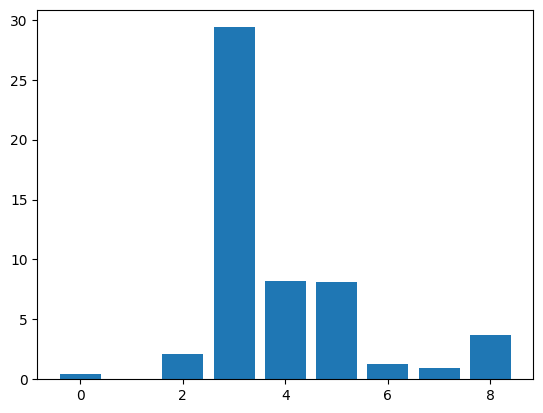

In [6]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot

# lets prepare load dataset
def load_dataset(filename):
    df= pd.read_csv(filename, header=None)
    #Convert this dataset into the numpy array
    data = df.values
    # Divide them into input and target variables
    X = data[:, :-1]
    y = data[:, -1]
    X = X.astype(str)
    return X, y

# Lets now define the inputs
def prepare_inputs(X_train, X_test):
    oe= OrdinalEncoder()
    oe.fit(X_train)
    X_train_en = oe.transform(X_train)
    X_test_en = oe.transform(X_test)
    return X_train_en, X_test_en

# Prepare target variables
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_en = le.transform(y_train)
    y_test_en = le.transform(y_test)
    return y_train_en, y_test_en

# Define the feature selection
def feature_selection(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

#From here now we will work on our data set
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/breast-cancer.csv'
X, y = load_dataset(url)
#We will now split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= 0.33, random_state= 1)
# Prepare the input data
X_train_en , X_test_en = prepare_inputs(X_train, X_test)
# Prepare the target data
y_train_en, y_test_en = prepare_targets(y_train, y_test)
# Prepare the feature selection
X_train_fs, X_test_fs, fs = feature_selection(X_train_en,y_train_en, X_test_en )
for i in range(len(fs.scores_)):
    print(f'Feature {i}:{fs.scores_[i]:.3f}')

#plot the graph
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()


#### Mutual Information Feature Selection
Mututal Infromation from the field of infromation theory is the application of information gain (typically used in construction trees) to feature selection.

This mutual information is calculated between two variables and measures the reduction in uncertanity for one variable given a known value of the other variable.

The scikit learn machine learning library provides an implementaition of mutual information for feature selection via the mutal_info_calssif() fucntion. Like chi2(), it can be sued in the SelectKBest feature selection strategu and other strategies.

Feature 0 = 0.000
Feature 1 = 0.019
Feature 2 = 0.040
Feature 3 = 0.000
Feature 4 = 0.038
Feature 5 = 0.083
Feature 6 = 0.022
Feature 7 = 0.000
Feature 8 = 0.097


<function matplotlib.pyplot.show(close=None, block=None)>

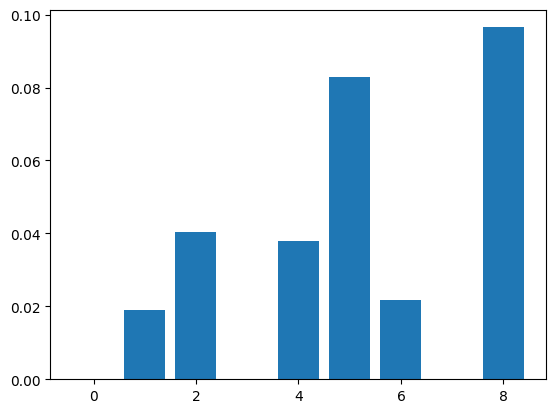

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot

# Create function to load the dataset
def load_dataset(filename):
    dataset = pd.read_csv(filename, header=None)
    #Convert the dataset into the numpy array
    data = dataset.values
    # split the data into X and y
    X = data[:, :-1]
    y = data[:, -1]
    X = X.astype(str)
    return X, y

# Create fuction to prepare inputs
def prepare_input(X_train, X_test):
    oe= OrdinalEncoder()
    oe.fit(X_train)
    X_train_en = oe.transform(X_train)
    X_test_en = oe.transform(X_test)
    return X_train_en, X_test_en 

#Create function to pepare target
def prepare_target(y_train, y_test):
    le= LabelEncoder()
    le.fit(y_train)
    y_train_en = le.transform(y_train)
    y_test_en = le.transform(y_test)
    return y_train_en, y_test_en

# create function for Featrue selection
def feature_selection(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/breast-cancer.csv'
X, y = load_dataset(url)
# split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state= 1)
# prepare the inputs
X_train_en, X_test_en = prepare_input(X_train, X_test)
#prepare the target
y_train_en, y_test_en = prepare_target(y_train, y_test)
# feature selection
X_train_fs, X_test_fs, fs = feature_selection(X_train_en, y_train_en, X_test_en)
#check the scores for the features 
for i in range (len(fs.scores_)):
    print(f"Feature {i} = {fs.scores_[i]:.3f}")

# at last plot the graph for visuals
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show

#### To check accuracy for the model built using mutual_info_classif()

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# load the dataset
def load_dataset(filename):
    # load the dataset as a pandas DataFrame
    data = pd.read_csv(filename, header=None)
    # retrieve numpy array
    dataset = data.values
    # split into input (X) and output (y) variables
    X = dataset[:, :-1]
    y = dataset[:,-1]
    # format all fields as string
    X = X.astype(str)
    return X, y
# prepare input data
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc
# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc
# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/breast-cancer.csv'
X, y = load_dataset(url)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# fit the model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_enc, y_train_enc)
# evaluate the model
evaluate_model = model.predict(X_test_enc)
# evaluate predictions
accuracy = accuracy_score(y_test_enc, evaluate_model)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 75.79


In [11]:
# evaluation of a model fit using chi squared input features
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# load the dataset
def load_dataset(filename):
    # load the dataset as a pandas DataFrame
    data = read_csv(filename, header=None)
    # retrieve numpy array
    dataset = data.values
    # split into input (X) and output (y) variables
    X = dataset[:, :-1]
    y = dataset[:,-1]
    # format all fields as string
    X = X.astype(str)
    return X, y

# prepare input data
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc
# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc
# feature selection
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k=4)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs
# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/breast-cancer.csv'
X, y = load_dataset(url)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# feature selection
X_train_fs, X_test_fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# fit the model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_fs, y_train_enc)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 74.74
